In [1295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [1296]:
# Load data
df = pd.read_csv('M1_final.csv')

In [1297]:
# Checking the shape of the DataFrame
df.shape

(28820, 23)

In [1298]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [1299]:
# Change data type of dew point to integer
df['Dew Point'] = pd.to_numeric(df['Dew Point'], errors='coerce').fillna(0).astype(int)

In [1300]:
df["Dew Point"].describe()

count    28820.000000
mean        30.058362
std         13.075796
min         -3.000000
25%         23.000000
50%         31.000000
75%         39.000000
max         67.000000
Name: Dew Point, dtype: float64

In [1301]:
# Update column names to snake_case

column_names = {"MONTH":"month",
                "DAY_OF_MONTH":"day_of_month",
                "DAY_OF_WEEK":"day_of_week",
                "OP_UNIQUE_CARRIER":"carrier_code",
                "TAIL_NUM":"flight_num",
                "DEST":"destination",
                "DEP_DELAY":"departure_delay",
                "CRS_ELAPSED_TIME":"scheduled_duration",
                "DISTANCE":"distance",
                "CRS_DEP_M":"scheduled_departure",
                "DEP_TIME_M":"actual_dep_time",
                "CRS_ARR_M":"scheduled_arrival",
                "Temperature":"temperature",
                "Dew Point":"dew_point",
                "Humidity":"humidity",
                "Wind":"wind",
                "Wind Speed":"wind_speed",
                "Wind Gust":"wind_gust",
                "Pressure":"pressure",
                "Condition":"condition",
                "sch_dep":"scheduled_departure_code",
                "sch_arr":"scheduled_arrival_code",
                "TAXI_OUT":"taxi_out",
                }

df = df.rename(columns=column_names)
df.head()

,month,day_of_month,day_of_week,carrier_code,flight_num,destination,departure_delay,scheduled_duration,distance,scheduled_departure,actual_dep_time,scheduled_arrival,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,condition,scheduled_departure_code,scheduled_arrival_code,taxi_out
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1302]:
# Checking for missing value
print(df.isnull().sum())

month                       0
day_of_month                0
day_of_week                 0
carrier_code                0
flight_num                  0
destination                 0
departure_delay             0
scheduled_duration          0
distance                    0
scheduled_departure         0
actual_dep_time             0
scheduled_arrival           0
temperature                 0
dew_point                   0
humidity                    0
wind                        2
wind_speed                  0
wind_gust                   0
pressure                    0
condition                   0
scheduled_departure_code    0
scheduled_arrival_code      0
taxi_out                    0
dtype: int64


In [1303]:
# Checking values of 'Wind' column
df['wind'].value_counts()

wind
W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: count, dtype: int64

In [1304]:
# Filling two missing values with 'W', which is the most common value for 'Wind' column
df['wind'] = df['wind'].fillna(value='W')

In [1305]:
# Checking sum of missing values
df.isnull().sum()

month                       0
day_of_month                0
day_of_week                 0
carrier_code                0
flight_num                  0
destination                 0
departure_delay             0
scheduled_duration          0
distance                    0
scheduled_departure         0
actual_dep_time             0
scheduled_arrival           0
temperature                 0
dew_point                   0
humidity                    0
wind                        0
wind_speed                  0
wind_gust                   0
pressure                    0
condition                   0
scheduled_departure_code    0
scheduled_arrival_code      0
taxi_out                    0
dtype: int64

In [1306]:
# Basic statistics
df.describe()


,month,day_of_month,day_of_week,departure_delay,scheduled_duration,distance,scheduled_departure,actual_dep_time,scheduled_arrival,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,scheduled_departure_code,scheduled_arrival_code,taxi_out
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.058362,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,13.075796,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [1307]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     28820 non-null  int64  
 1   day_of_month              28820 non-null  int64  
 2   day_of_week               28820 non-null  int64  
 3   carrier_code              28820 non-null  object 
 4   flight_num                28820 non-null  object 
 5   destination               28820 non-null  object 
 6   departure_delay           28820 non-null  int64  
 7   scheduled_duration        28820 non-null  int64  
 8   distance                  28820 non-null  int64  
 9   scheduled_departure       28820 non-null  int64  
 10  actual_dep_time           28820 non-null  int64  
 11  scheduled_arrival         28820 non-null  int64  
 12  temperature               28820 non-null  int64  
 13  dew_point                 28820 non-null  int64  
 14  humidi

In [1308]:
# Save updated dataframe as CSV file
df.to_csv('updated_M1.csv', index=False)

In [1309]:
# Identify duplicate rows
duplicates = df.duplicated()
# Print total number of duplicated rows
print(duplicates.sum())

0


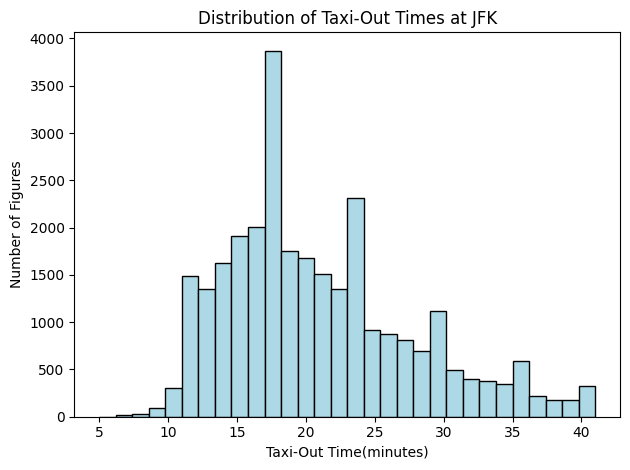

In [1310]:
# Convert taxi_out to a numpy array
taxiout = np.array(df['taxi_out'])

# Create a figure
fig = plt.figure()

# Create subplot
ax = fig.subplots()

# Create a histogram (bar plot)
ax.hist(taxiout, bins=30, color='lightblue', edgecolor='black')

# Add title and labels
ax.set_title('Distribution of Taxi-Out Times at JFK')
ax.set_xlabel('Taxi-Out Time(minutes)')
ax.set_ylabel('Number of Figures')

plt.tight_layout()

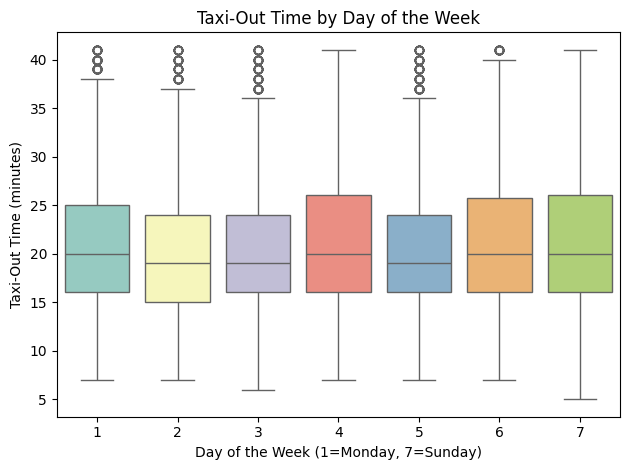

In [1311]:
# Define colors for each day if the week
custom_colours = sns.color_palette("Set3", 7)

# Create a figure
fig = plt.figure()

# Create subplot
ax = fig.subplots()

# Create the boxplot
sns.boxplot(
    x=df['day_of_week'],
    y=df['taxi_out'],
    data=df,
    ax=ax,
    hue='day_of_week',
    palette=custom_colours,
    legend=False)

# Add title and labels
ax.set_title('Taxi-Out Time by Day of the Week')
ax.set_xlabel('Day of the Week (1=Monday, 7=Sunday)')
ax.set_ylabel('Taxi-Out Time (minutes)')

plt.tight_layout()
plt.show()

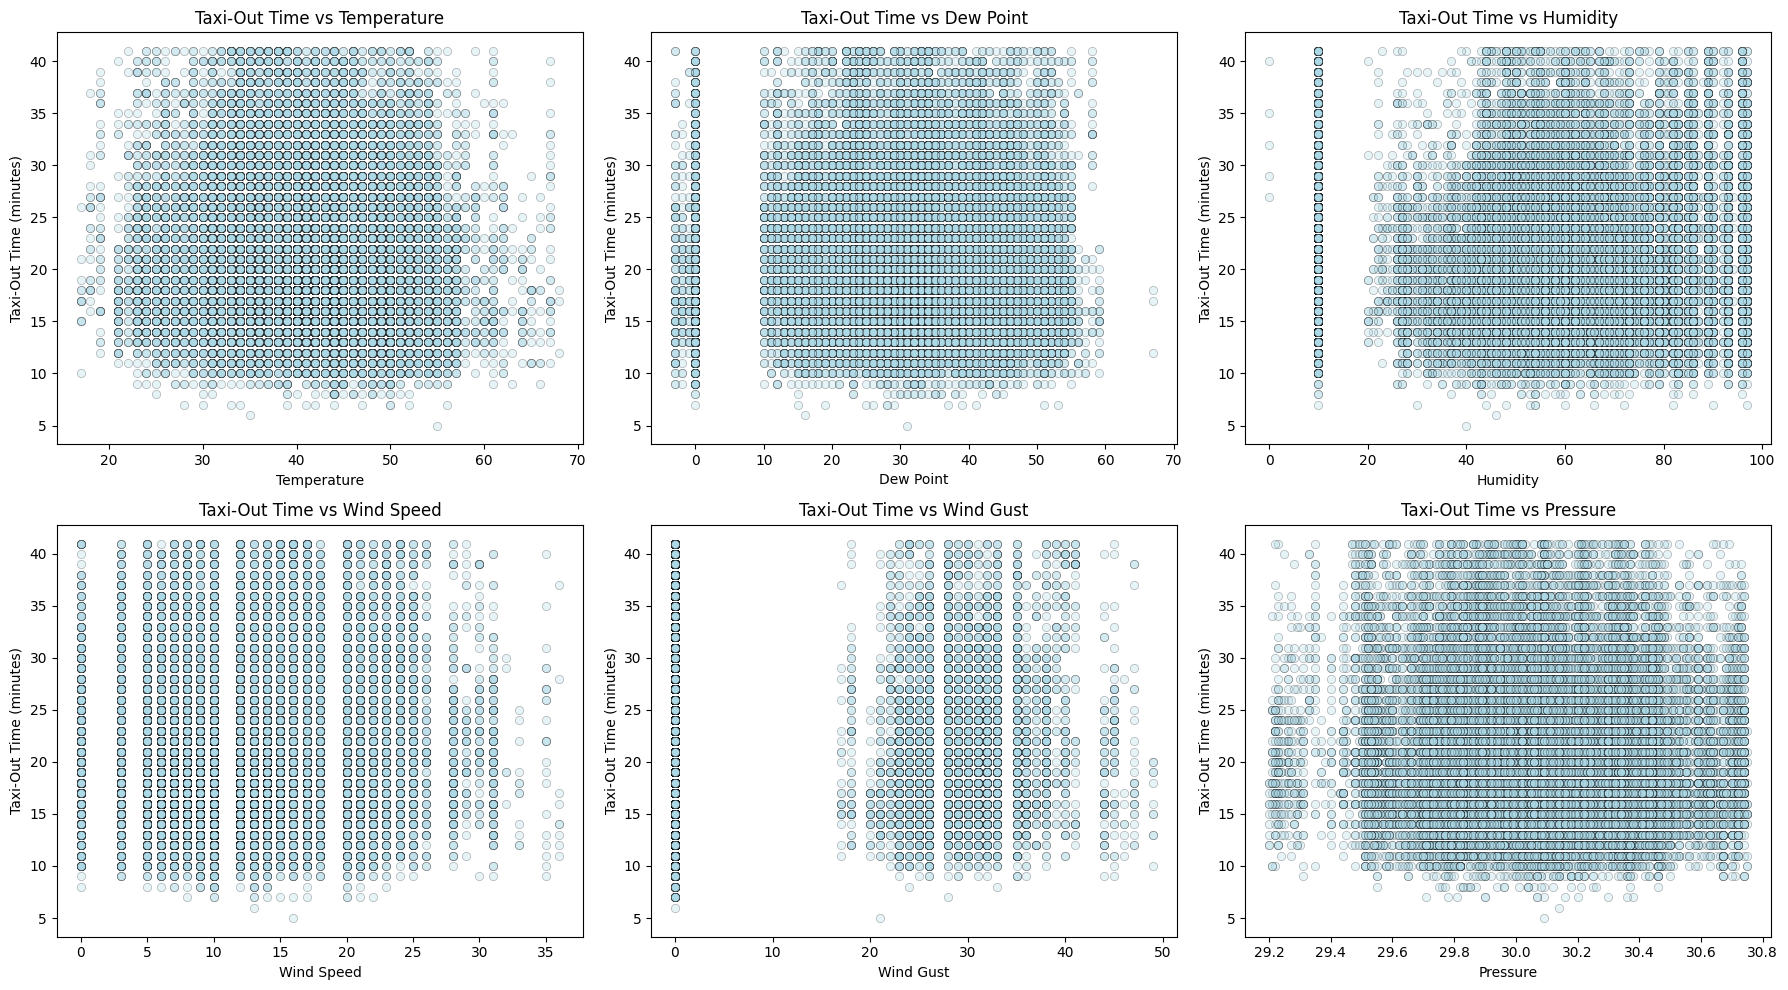

In [1312]:
# Define weather-related columns
weather_columns = ['temperature', 'dew_point', 'humidity', 'wind_speed', 'wind_gust', 'pressure']

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Loop through weather columns and create scatter plots
for ax, col in zip(axes.flatten(), weather_columns):
    sns.scatterplot(data=df, x=col, y='taxi_out', alpha=0.3, ax=ax, color='lightblue', edgecolor='black')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Taxi-Out Time (minutes)')
    ax.set_title(f'Taxi-Out Time vs {col.replace("_", " ").title()}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Linear Regression

In [1313]:
df.head()

,month,day_of_month,day_of_week,carrier_code,flight_num,destination,departure_delay,scheduled_duration,distance,scheduled_departure,actual_dep_time,scheduled_arrival,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,condition,scheduled_departure_code,scheduled_arrival_code,taxi_out
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1314]:
# Prepare features and target variable
features = ['month', 'day_of_month', 'day_of_week', 'temperature', 'dew_point', 'humidity', 'wind_speed', 'wind_gust', 'pressure', 'departure_delay', 'scheduled_duration', 'distance', 'scheduled_departure']
target = 'taxi_out'

In [1315]:
# Feature selection
X = df[features].values
y = df[target].values

In [1316]:
X


array([[1.100e+01, 1.000e+00, 5.000e+00, ..., 1.240e+02, 6.360e+02,
        3.240e+02],
       [1.100e+01, 1.000e+00, 5.000e+00, ..., 3.710e+02, 2.475e+03,
        3.400e+02],
       [1.100e+01, 1.000e+00, 5.000e+00, ..., 1.810e+02, 1.069e+03,
        3.010e+02],
       ...,
       [1.000e+00, 3.100e+01, 5.000e+00, ..., 3.920e+02, 2.422e+03,
        1.125e+03],
       [1.000e+00, 3.100e+01, 5.000e+00, ..., 2.240e+02, 1.598e+03,
        1.417e+03],
       [1.000e+00, 3.100e+01, 5.000e+00, ..., 2.250e+02, 1.576e+03,
        1.439e+03]], shape=(28820, 13))

In [1317]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1318]:
X_train

array([[1.100e+01, 4.000e+00, 1.000e+00, ..., 1.240e+02, 6.360e+02,
        3.240e+02],
       [1.100e+01, 1.300e+01, 3.000e+00, ..., 2.520e+02, 1.391e+03,
        4.000e+02],
       [1.200e+01, 2.600e+01, 4.000e+00, ..., 3.140e+02, 1.826e+03,
        1.193e+03],
       ...,
       [1.100e+01, 3.000e+00, 7.000e+00, ..., 1.240e+02, 4.830e+02,
        1.225e+03],
       [1.200e+01, 2.100e+01, 6.000e+00, ..., 1.060e+02, 2.130e+02,
        1.200e+03],
       [1.000e+00, 1.500e+01, 3.000e+00, ..., 3.910e+02, 2.475e+03,
        1.055e+03]], shape=(23056, 13))

In [1319]:
# feature scaling
# standard scaler - mean of 0 and a standard deviation of 1
# minmaxscaler ---- min, max 0, 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1320]:
# Initialiaze multi Linear Regression model
lin_reg = LinearRegression()

In [1321]:
# Train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [1322]:
# prediction on the test set
y_pred_mlr = lin_reg.predict(X_test)

In [1323]:
# put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr })

,Actual value,Predicted value
0,32,21.418957
1,15,20.963970
2,20,22.608466
3,13,21.735659
4,25,19.633887
...,...,...
5759,23,21.579396
5760,24,19.674033
5761,20,21.197641
5762,37,20.075930


In [1324]:
# model evaluation 
# r2, mean absolute error, mean square error, root mean square error
# 0, 1
# mae must have a lower mae 0. 
# mse --o.
# rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_mlr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.05121100621909436
Mean Absolute Error: 5.372594348056127
Mean Square Error: 44.721217228329515
Root Mean Square Error: 6.687392408729243
